# Sequence Profile Alignment Method

First we begin with libraries importations

In [4]:
import numpy as np
from Bio.Seq import Seq
from Bio import SeqIO
import pandas as pd
import math
import graphviz
from sys import maxsize
from importlib import reload
import Needle
reload(Needle)
print("Done")

Done


### BIOSUM62

We import the BIOSUM62 matrix as a pandas array. First we need to read the file and replace adjust the characters (replace some stuff).

In [5]:
f = open("data/blosum62.txt")
m = f.read().replace("   ", "  ").replace("  ", " ")[1:].replace(" \n", "\n").replace('.', '-')
f.close()
f = open("data/blosum62_good.txt", "w+")
f.write(m[:-1])
f.close()

with open("data/blosum62_good.txt") as f:
    df = pd.read_csv("data/blosum62_good.txt", sep=" ")
    f.close()
df

,A,R,N,D,C,Q,E,G,H,I,...,P,S,T,W,Y,V,B,Z,X,-
A,4,-1,-2,-2,0,-1,-1,0,-2,-1,...,-1,1,0,-3,-2,0,-2,-1,0,-4
R,-1,5,0,-2,-3,1,0,-2,0,-3,...,-2,-1,-1,-3,-2,-3,-1,0,-1,-4
N,-2,0,6,1,-3,0,0,0,1,-3,...,-2,1,0,-4,-2,-3,3,0,-1,-4
D,-2,-2,1,6,-3,0,2,-1,-1,-3,...,-1,0,-1,-4,-3,-3,4,1,-1,-4
C,0,-3,-3,-3,9,-3,-4,-3,-3,-1,...,-3,-1,-1,-2,-2,-1,-3,-3,-2,-4
Q,-1,1,0,0,-3,5,2,-2,0,-3,...,-1,0,-1,-2,-1,-2,0,3,-1,-4
E,-1,0,0,2,-4,2,5,-2,0,-3,...,-1,0,-1,-3,-2,-2,1,4,-1,-4
G,0,-2,0,-1,-3,-2,-2,6,-2,-4,...,-2,0,-2,-2,-3,-3,-1,-2,-1,-4
H,-2,0,1,-1,-3,0,0,-2,8,-3,...,-2,-1,-2,-2,2,-3,0,0,-1,-4
I,-1,-3,-3,-3,-1,-3,-3,-4,-3,4,...,-3,-2,-1,-3,-1,3,-3,-3,-1,-4


### Needleman-Wunch for sequence/sequence alignment

In [37]:
seq1 = "CAT"
seq2 = "CHAT"
needle_computation = Needle.Needle_Computation(seq1, seq2, blosum=df, IGP=-2, OGP=-4)
#print_score_matrix(matrix)
needle_computation.Compute_Matrix()
needle_computation.Compute_Traceback()
print(f"Best score : {needle_computation.M[-1][-1].score}")
for s in needle_computation.alignments:
    print(s)
print(str(needle_computation))

Best score : 16.0
C-AT
CHAT
										
	0←	-4←	-6←	-8←	-10
	↑	↖								
	-4	9.0←	7.0←	5.0←	3.0
	↑		↑	↖		↖				
	-6	5.0	7.0	11.0←	9.0
	↑		↑	↖	↑	↖	↑	↖		
	-8	3.0	3.0	7.0	16.0



### Progressive approach

#### Needle for profile/profile

The function used for profile/profile can be used to compute profile/sequence alignments

In [47]:
seq1 = ["HER"]
seq2 = ["C-AT", "CHAT"]
needle = Needle.Needle_Computation(seq1, seq2, blosum=df, IGP=-2, OGP=-4)
needle.Compute_Matrix()
needle.Compute_Traceback()
print(f"Best score : {needle.M[-1][-1].score}")
print("Final alignment : ")
for s in needle.alignments:
    print(s)

Best score : -4.0
Final alignment : 
-HER
C-AT
CHAT


In [49]:
seq1 = ["H-ER", "HAER"]
seq2 = ["C-ATR", "CHATR"]
needle = Needle.Needle_Computation(seq1, seq2, blosum=df, IGP=-2, OGP=-4)
needle.Compute_Matrix()
needle.Compute_Traceback()
print(f"Best score : {needle.M[-1][-1].score}")
print("Final alignment : ")
for s in needle.alignments:
    print(s)

Best score : 2.0
Final alignment : 
-H-ER
-HAER
C-ATR
CHATR


#### Tree Creation

We first compute the distance matrix between all the pairs of 2 sequences, with the best alignment's score as distance. Then we deduce the UPGMA tree with the clustering method.

Best score : -5.555555555555556
Final alignment : 
-HAER
-H-ER
-WA--
CHA-T
C-A-T
-HACR


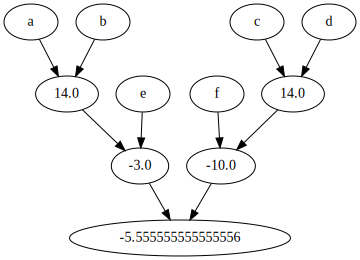

In [66]:
reload(Needle)
seqs = ["CAT", "CHAT", "HER", "HAER", "HACR", "WA"]
tree = Needle.Guide_Tree(seqs, df, labels=["a", "b", "c", "d", "e", "f"])
tree.Compute_Dmatrix()
tree.Compute_UPGMA()
G, best_score = tree.graph, tree.best_score
final_alignment = tree.consensus
print(f"Best score : {best_score}")
print("Final alignment : ")
for s in tree.consensus:
    print(s)
G

#### Results for orthologs file

In [61]:
def fasta_to_list(fasta_file: str)->str:
    """return the string sequence of the fasta format sequence

    Args:
        fasta_file (str): path to the fasta file

    Returns:
        str: string sequences
    """
    list = []
    for record in SeqIO.parse(fasta_file, "fasta"):
        list.append((record.id, record.seq))
    return list

Best score : 504.2666666666665
Final alignment : in data/orthologs_result.txt


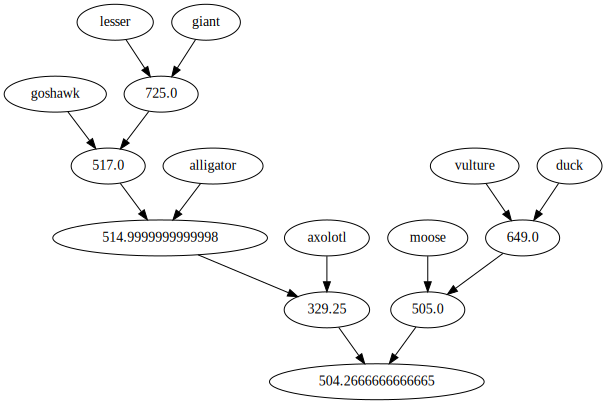

In [67]:
reload(Needle)
l = fasta_to_list("data/orthologs.fasta")
seqs = [str(i[1]) for i in l]
labels = [str(i[0]) for i in l]
tree = Needle.Guide_Tree(seqs, df, labels=labels, IGP=-2, OGP=-4)
tree.Compute_Dmatrix()
tree.Compute_UPGMA()
G, best_score, final_alignment = tree.graph, tree.best_score, tree.consensus
print(f"Best score : {best_score}")
print("Final alignment : in data/orthologs_result.txt")
with open("data/orthologs_result.txt", 'w+') as file:
    for s in tree.consensus:
        file.write(s + '\n')
G

### Structure alignment

In [7]:
from Bio.PDB import *
pdbl_init = PDBList()

We import the pdb file, extract the C alpha chain of 2 similar protein. Then we first aligned them to extract the intersection of the 2 chains. Finaly we find the good rotation of them, so we can calculate the distance to make a more precise alignment.

In [2]:
def download_PDB(id: str, pdbl = None, overwrite = False)->str:
    """download the pdb file from the id

    Args:
        id (str): id of the fasta
        pdbl (PDBList, optional): PDBList, so that we don't have to download it every time. Defaults to None.
        overwrite (bool, optional): If we want to force the download. Defaults to False 
    Return:
        str: the path of the pdb file
    """

    if pdbl == None:
        pdbl = PDBList()
    return pdbl.retrieve_pdb_file(id, file_format="pdb", overwrite=overwrite)

def calpha(pdbfile: str, id= 'toto')->list:
    """return the list of the calphas

    Args:
        pdbfile (str): path to pdbfile
        id (str, optional): a name. Defaults to 'toto'.

    Returns:
        list: list of (res_name, calpha)
    """
    l=[]
    parser = PDBParser()
    structure = parser.get_structure(id, pdbfile)
    for chain in structure[0]:
        for residue in chain:
            for atom in residue:
                if atom.name == 'CA':
                    aa3 = residue.get_resname()
                    aa1 = protein_letters_3to1[aa3]
                    l.append((aa1, atom))
                    break
    return l

def superposition(fixed: list, moving: list):
    """superpose moving to fixed, in order to minimize the RMSD

    Args:
        fixed (list): list of (res_name, atom)
        moving (list): list of (res_name, atom)
    """
    #We begin by a needlmanwuncht to have the intersection of fixed and moving
    fixed_seq = ""
    for i in fixed:
        fixed_seq += i[0]
    moving_seq = ""
    for i in moving:
        moving_seq += i[0]
    needle = Needle.Needle_Computation(fixed_seq, moving_seq, OGP=-4, IGP=-2, blosum=df)
    needle.Compute_Matrix()
    needle.Compute_Traceback()
    T = needle.alignments

    #Then we extract the intersection
    aligned_fixed, aligned_moving = T[0], T[1]
    fixed_intersect = []
    moving_intersect = []
    i,j = 0,0
    for t in range(len(aligned_fixed)):
        test = False
        if aligned_fixed[t]!='-':
            i+=1
            test  = True
        if aligned_moving[t]!='-':
            j+=1
            if test:
                fixed_intersect.append(fixed[i][1])
                moving_intersect.append(moving[j][1])
    
    fixed_atom = [i[1] for i in fixed]
    moving_atom = [i[1] for i in moving]
    sup = Superimposer()
    sup.set_atoms(fixed_intersect, moving_intersect)
    sup.apply(moving_atom)
    for i in range(len(moving)):
        moving[i] = (moving[i][0], moving_atom[i])

In [12]:
download_PDB("1abb", PDBList(), overwrite=True)
download_PDB("1abo", PDBList(), overwrite=True)

'/home/axeldecesson/Documents/Scolar/BIO_INF588/StructureAlignments/ab/pdb1abo.ent'

In [13]:
l1, l2 = calpha("ab/pdb1abb.ent"), calpha("ab/pdb1abo.ent")

/home/axeldecesson/miniconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 27664.
  warnings.warn(
/home/axeldecesson/miniconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 27669.
  warnings.warn(
/home/axeldecesson/miniconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 27674.
  warnings.warn(
/home/axeldecesson/miniconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 27679.
  warnings.warn(
/home/axeldecesson/miniconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 27684.
  warnings.warn(
/home/axeldecesson/miniconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstru